In [1]:
import numpy as np
import matplotlib.pyplot as graph
from scipy.integrate import odeint

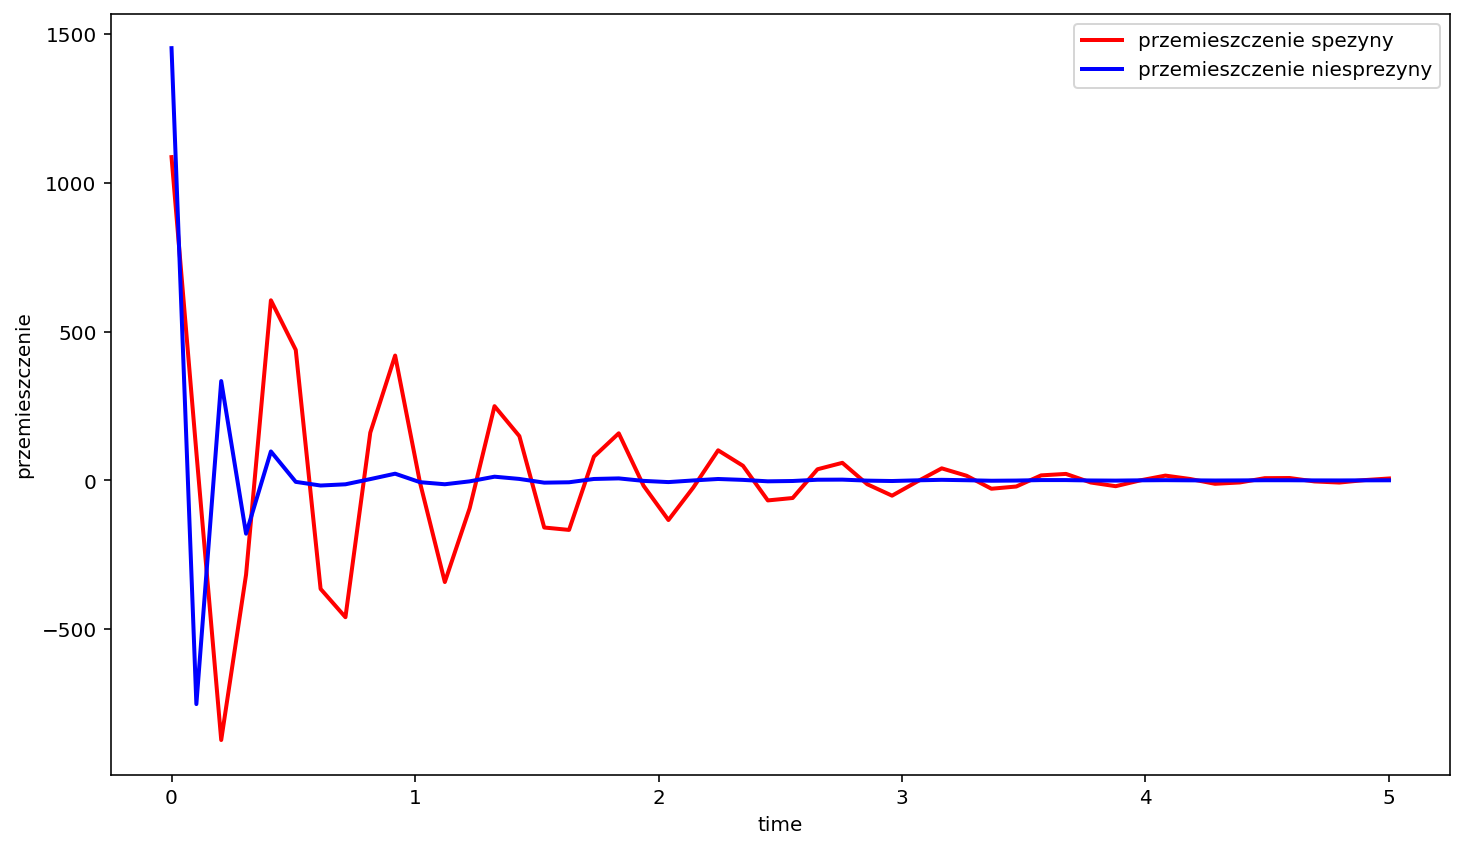

In [21]:
def rideanalysis(x,t):
 m_sprung=100
 m_unsprung=20
 spring_stiffness=20000
 tire_stiffness=22000
 zeta=0.08
 B=2*zeta*(spring_stiffness/m_sprung)**0.5*m_sprung
 r0=0.05
 omega=55
 r=r0*np.sin(omega*t)
 q1,q2,q3,q4=x
 # q1 m_sprung przemieszcznie q2 m_sprung predkosc 
 # q3 m_unsprung przemieszczenie q4 m_unsprung predkosc
 q1dot=q2
 q2dot=-(spring_stiffness/m_sprung)*(q1-q3)-(B/m_sprung)*(q2-q4)
 q3dot=q4
 q4dot=(spring_stiffness/m_unsprung)*(q1-q3)+(B/m_unsprung)*(q2-q4)-tire_stiffness*(q3-r)
 states=(q1dot,q2dot,q3dot,q4dot)
 return states

i0=np.empty(4)
t=np.linspace(0,5)
x=odeint(rideanalysis,i0,t)
graph.plot(t,x[:,0],'r-',linewidth=2,label='przemieszczenie spezyny')
graph.plot(t,x[:,2],'b-',linewidth=2,label='przemieszczenie niesprezyny')
graph.xlabel('time')
graph.ylabel('przemieszczenie')
graph.legend()


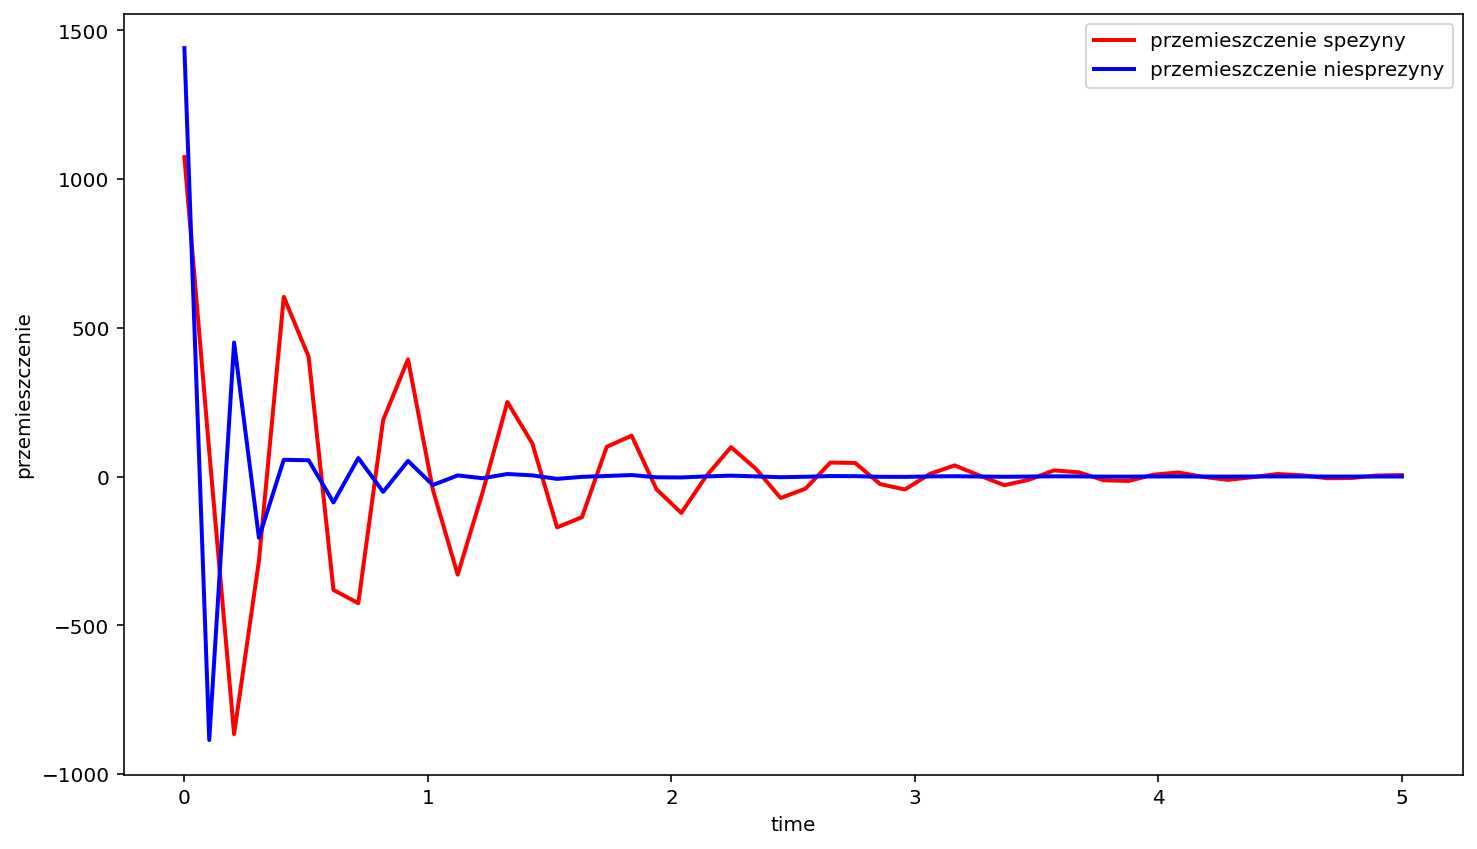